[array([0.64426078, 0.50487248]), array([-6.91001979, -4.43677185])]
[array([5.22657056, 5.02991175]), array([-5.29781951, -4.90966276])]
[array([5.22657056, 5.02991175]), array([-5.29781951, -4.90966276])]


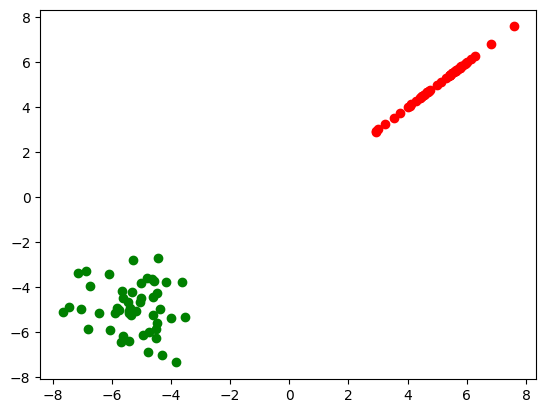

In [17]:
import numpy as np
import random
from sklearn.datasets import make_blobs

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters= n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids =X[random_index]
        for i in range(self.max_iter):
            cluster_group=self.assign_clusters(X)
            old_centroids=self.centroids
            self.centroids=self.move_centroids(X,cluster_group)
            if (old_centroids == self.centroids).all():
                break
        return cluster_group    
    def assign_clusters(self,X):
        cluster_group=[]
        distances=[]
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid))) 
            min_distance=min(distances)
            index_pos=distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids =[]
        cluster_type=np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centroids)


centroids=[(-5,-5),(5,5)]

cluster_std=[1,1]
X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)
km=KMeans(n_clusters=2,max_iter=100)
y_means = km.fit_predict(X)
plt.scatter(X[y_means ==0,1],X[y_means == 0,1],color="red")
plt.scatter(X[y_means ==1,0],X[y_means == 1,1],color="green")
plt.show()

In [8]:
import matplotlib.pyplot as plt